## Exploratory Data Analysis of the 'Pima Indians Diabetes' dataset.
### Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

The dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The purpose of the analysis is to predict, based on certain diagnostic measurements, whether a patient has diabetes. The patients are a group of women at least 21 years old from the Pima Indian tribe.
The dataset consists of several medical predictors and one target variable, Outcome. The predictor variables are number of pregnancies, BMI, insulin levels, age and so on.

* Pregnancies: number of pregnancies.
* Glucose: plasma glucose concentration after a 2-hour oral glucose load test.
* BloodPressure: diastolic blood pressure (mm Hg).
* SkinThickness: triceps skinfold thickness (mm).
* Insulin: 2-hour serum insulin (IU/mL)(mu U/mL).
* BMI: body mass index (weight in kg/(height in m)^2).
* DiabetesPedigreeFunction: diabetes pedigree function.
* Age: Age (in years).
* Outcome: class variable (0 - healthy or 1 - sick).

Source:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
# load dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape # 768 objects, 9 columns

(768, 9)

In [4]:
diabetes.columns.values 

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [5]:
diabetes.info() # all features of numeric type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Brak brakujących danych. 

In [8]:
diabetes.duplicated().sum() 

0

### Brak duplikatów.

In [9]:
diabetes.isin({0}).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### A lot of null values. Are these errors, missing data, or null/negative results?

### For pregnancies, a result of 0, is a negative result. The question is whether it is only negative results or also missing data, because patients refused to answer or were not asked. For the other features (except for the categorical feature Outcome), a score of 0 indicates errors or missing data. The question is, what to do about it? If the 0 values, represent a small percentage of the data, you can ignore them. Or convert them to mean or median. But this can falsify the results, affecting the distribution, variance and correlations between features. Single rows can be removed. If they make up most of the data, an entire column can be removed. But deleting data, will result in loss of relevant information.

In [10]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Only one categorical feature -> Outcome.

In [11]:
np.sort(diabetes['Outcome'].unique())

array([0, 1], dtype=int64)

### Statistics:
* Number of pregnancies [Pregnancies]: from 0 to 17.
* Age of women [Age]: from 21 to 81.
* Glucose level [Glucose]: from 0 to 199.
* Blood pressure [BloodPressure]: from 0 to 122.
* Skin thickness [SkinThickness]: 0 to 99
* [Insulin]: 0 to 846
* [BMI]: 0 to 67.1
* Diabetes pedigree function [DiabetesPedigreeFunction]: 0.078 to 2.42.
* [Outcome], meaning whether someone has diabetes or not: 1 - diabetes, 0 - healthy person.


In [ ]:
diabetes.Outcome.value_counts() # 268 women have diabetes '1', 500 are healthy women '0'

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
diabetes.Outcome.value_counts(normalize = True).round(2)

Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64

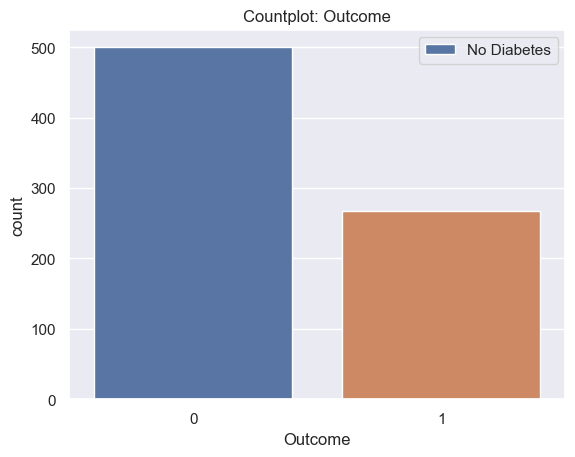

In [14]:
sns.countplot(x ='Outcome', data = diabetes)
plt.title('Countplot: Outcome')
legend_labels = ['No Diabetes', 'Diabetes']
plt.legend(legend_labels, loc='best')

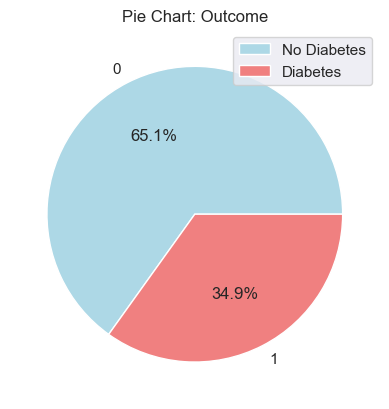

In [15]:
outcome_counts = diabetes['Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Pie Chart: Outcome')
legend_labels = ['No Diabetes', 'Diabetes']
plt.legend(legend_labels, loc='best')

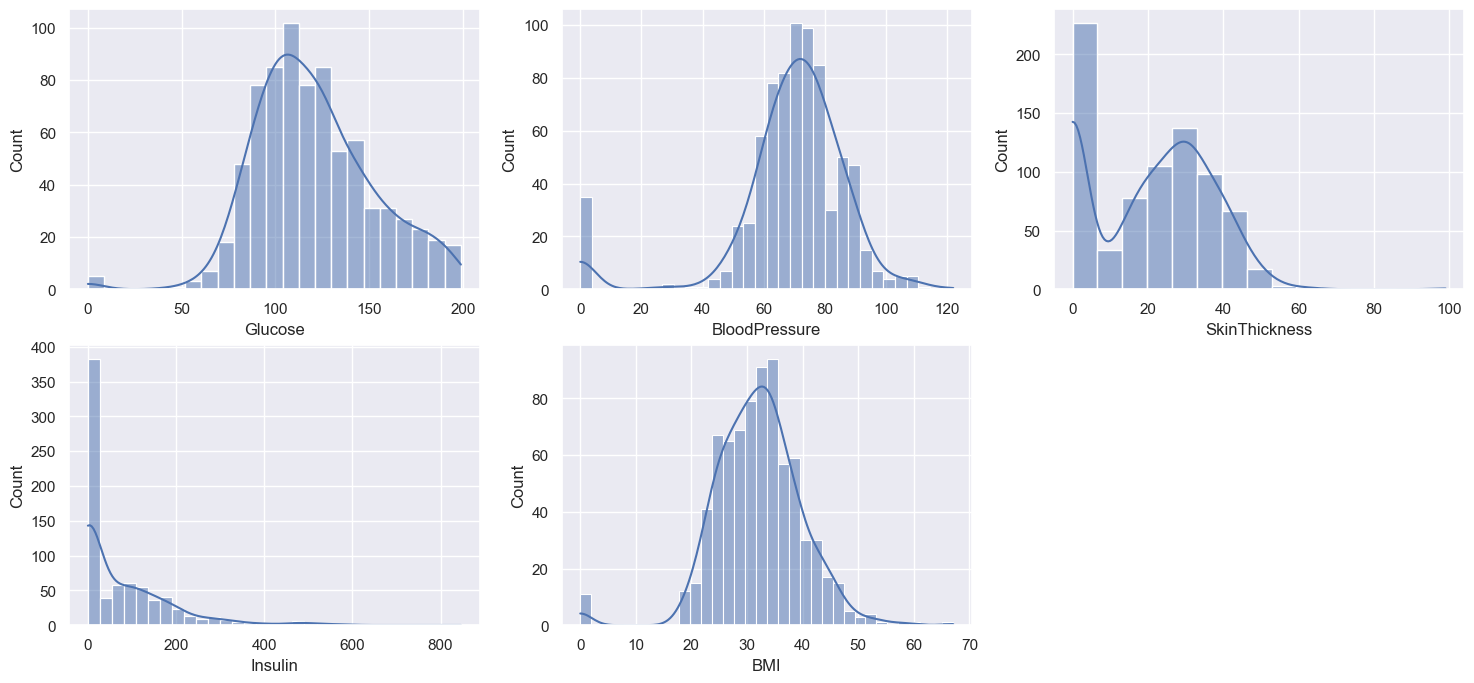

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

sns.histplot(data = diabetes, x = 'Glucose', kde=True, ax = axs[0, 0])
sns.histplot(data = diabetes, x = 'BloodPressure', kde=True, ax = axs[0, 1])
sns.histplot(data = diabetes, x = 'SkinThickness', kde=True, ax = axs[0, 2])
sns.histplot(data = diabetes, x = 'Insulin', kde=True, ax = axs[1, 0])
sns.histplot(data = diabetes, x = 'BMI', kde=True, ax = axs[1, 1])

axs[1, 2].axis('off')

### No normal distributions. It can be seen that values of 0 stand out and affect the distributions especially for Insulin and Skin Thickness. I'll need to investigate values of 0 later.

Text(0.5, 1.0, 'Heatmap correlation')

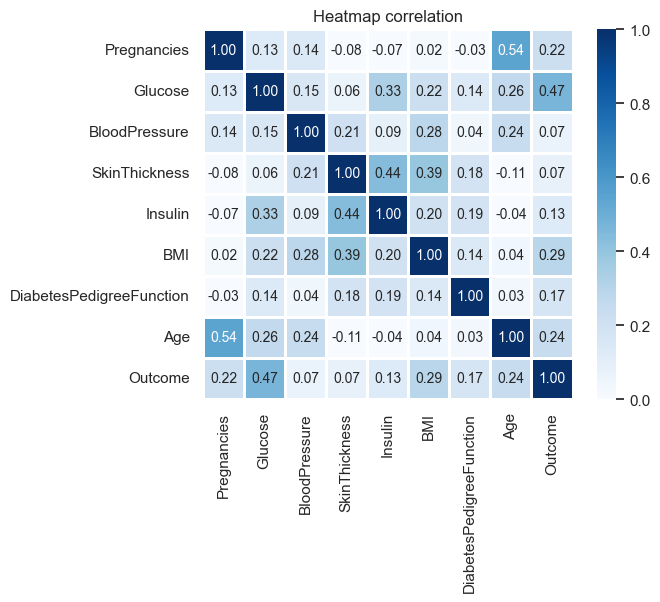

In [17]:
corr = diabetes.corr()
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

### Correlation between number of pregnancies and age (0.54), between glucose and outcome (0.47). The small correlation between BMI and skin thickness, and between Insulin and skin thickness is probably due to the zero values. I'll have to check the correlations again, after dealing with the 0 values.

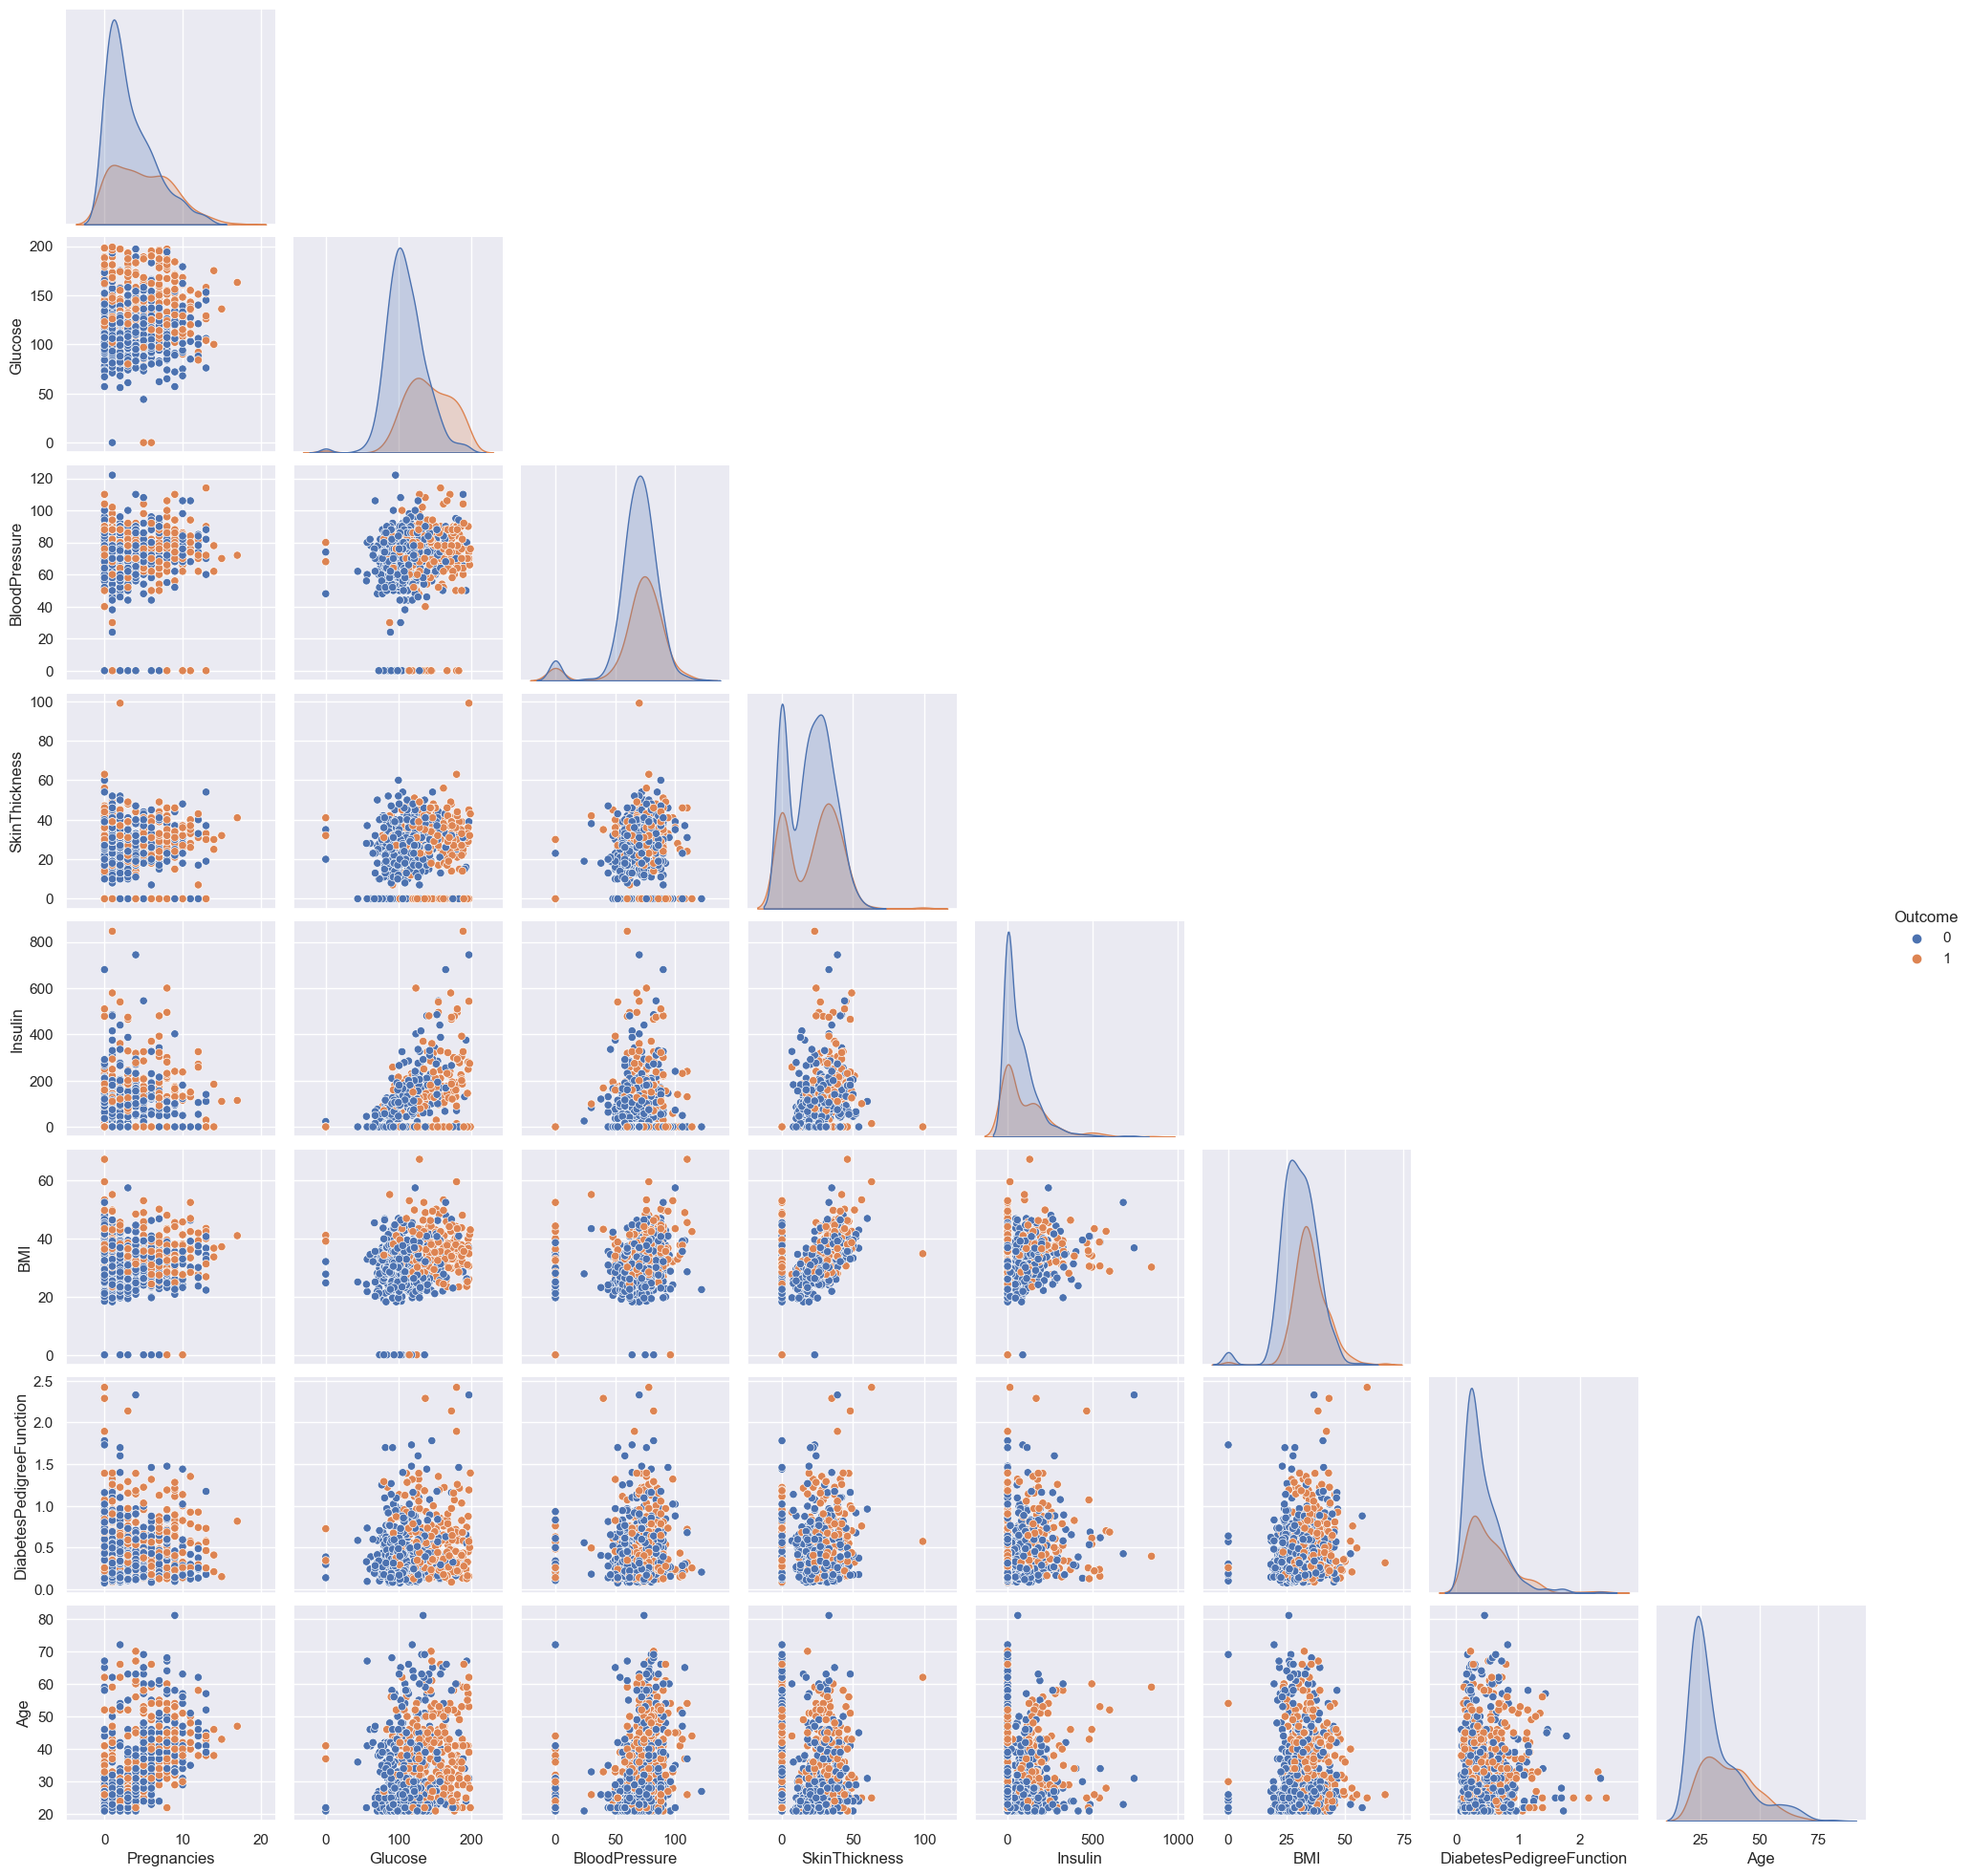

In [18]:
sns.pairplot(data = diabetes, hue = 'Outcome', corner = True, diag_kind = 'kde')

### I analyze outliers. I'll deal with zero values at the end of the analysis.

Text(0.5, 1.0, 'Box Plot of Age by Outcome')

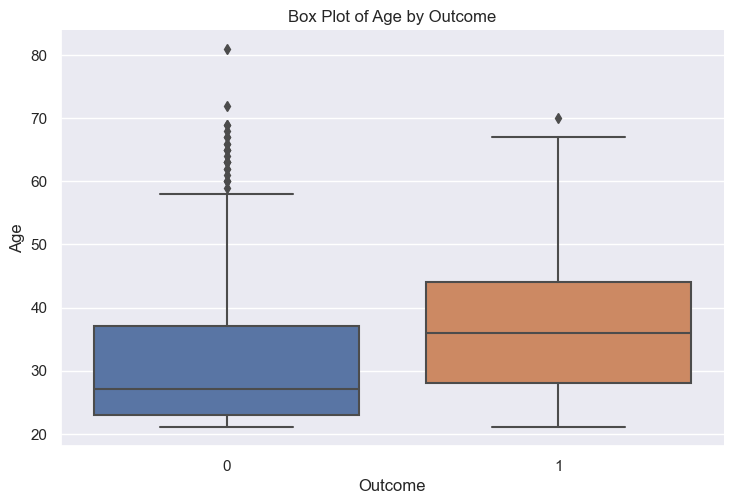

In [19]:
sns.catplot(x = 'Outcome', y = 'Age', data = diabetes, kind = 'box', aspect = 1.5)
plt.title("Box Plot of Age by Outcome")

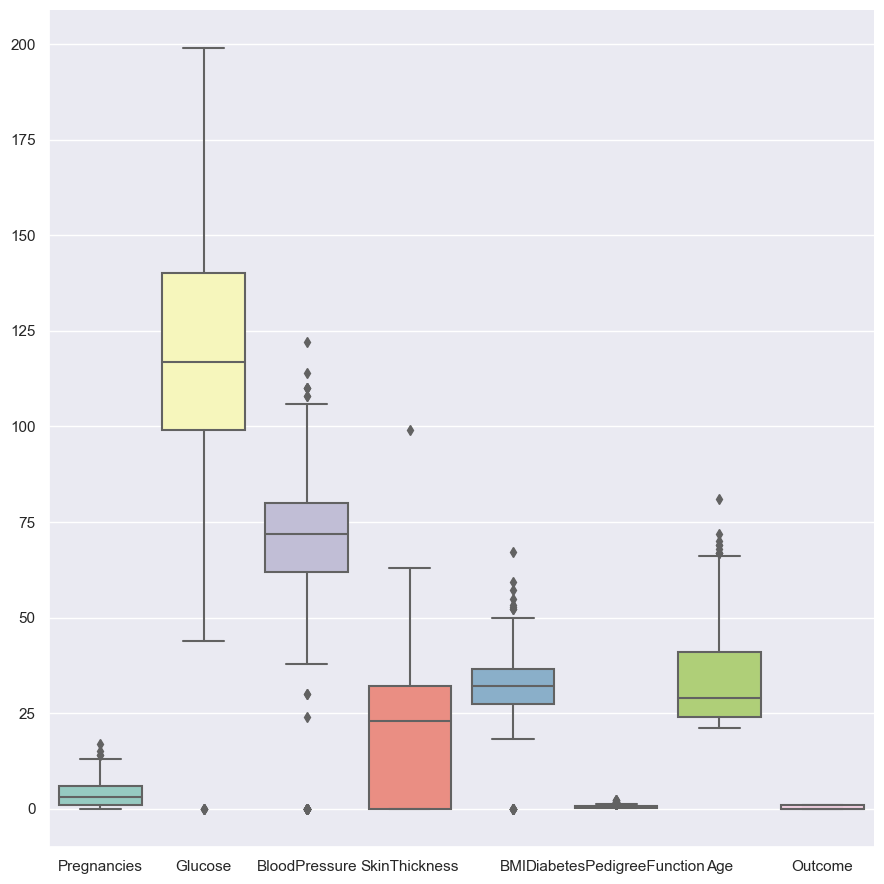

In [20]:
diabetes2 = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
sns.catplot(data = diabetes2, height = 9, kind = 'box', palette='Set3')

<Axes: xlabel='Insulin'>

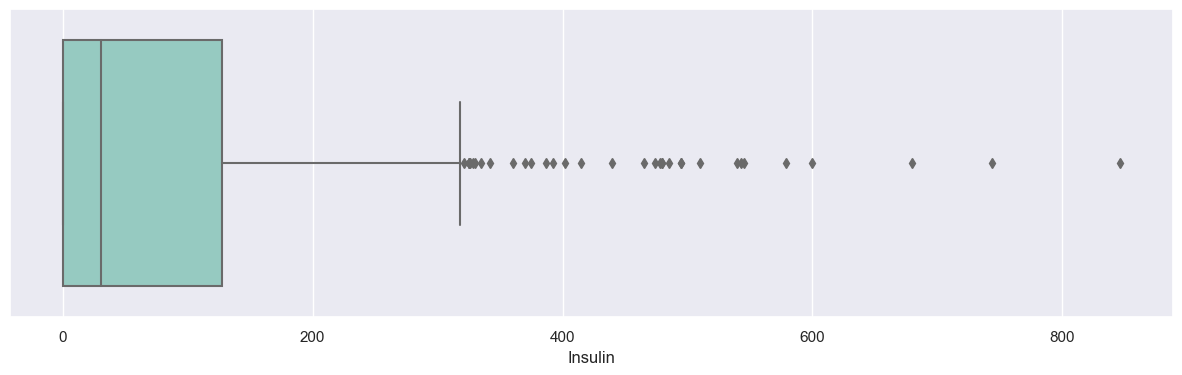

In [21]:
plt.figure(figsize=(15, 4))
sns.boxplot(x='Insulin', data = diabetes, palette='Set3')

<Axes: xlabel='DiabetesPedigreeFunction'>

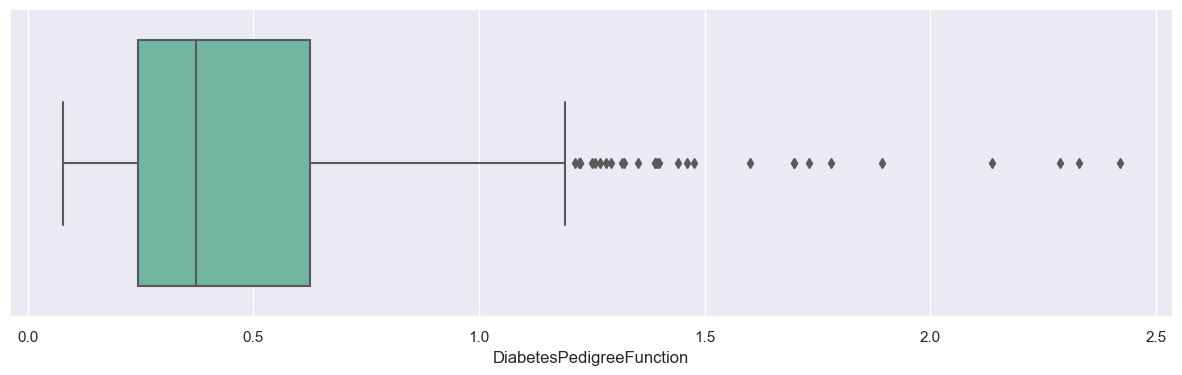

In [22]:
plt.figure(figsize=(15, 4))
sns.boxplot(x = 'DiabetesPedigreeFunction', data = diabetes, palette='Set2')

### Lots of outliers. The question is what to do with them? They can be removed or replaced with other values, but outlier results may indicate sick people, so I think it is better not to remove them and run the analysis with them. They don't look like errors.

In [23]:
diabetes.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [24]:
diabetes[diabetes.Glucose == 199] # sick, so she may have such high glucose levels

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1


In [25]:
diabetes[diabetes.BloodPressure == 122] # this is the probable result; this is a healthy person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0


In [26]:
diabetes[diabetes.SkinThickness == 99] # this is a sick person, so I think a result of 99 is possible

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [27]:
diabetes[diabetes.Insulin == 846] # sick, obese person, probable outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1


In [28]:
diabetes[diabetes.BMI == 67.1] # sick person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129,110,46,130,67.1,0.319,26,1


In [29]:
diabetes[diabetes.DiabetesPedigreeFunction == 2.42] # sick person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.42,25,1


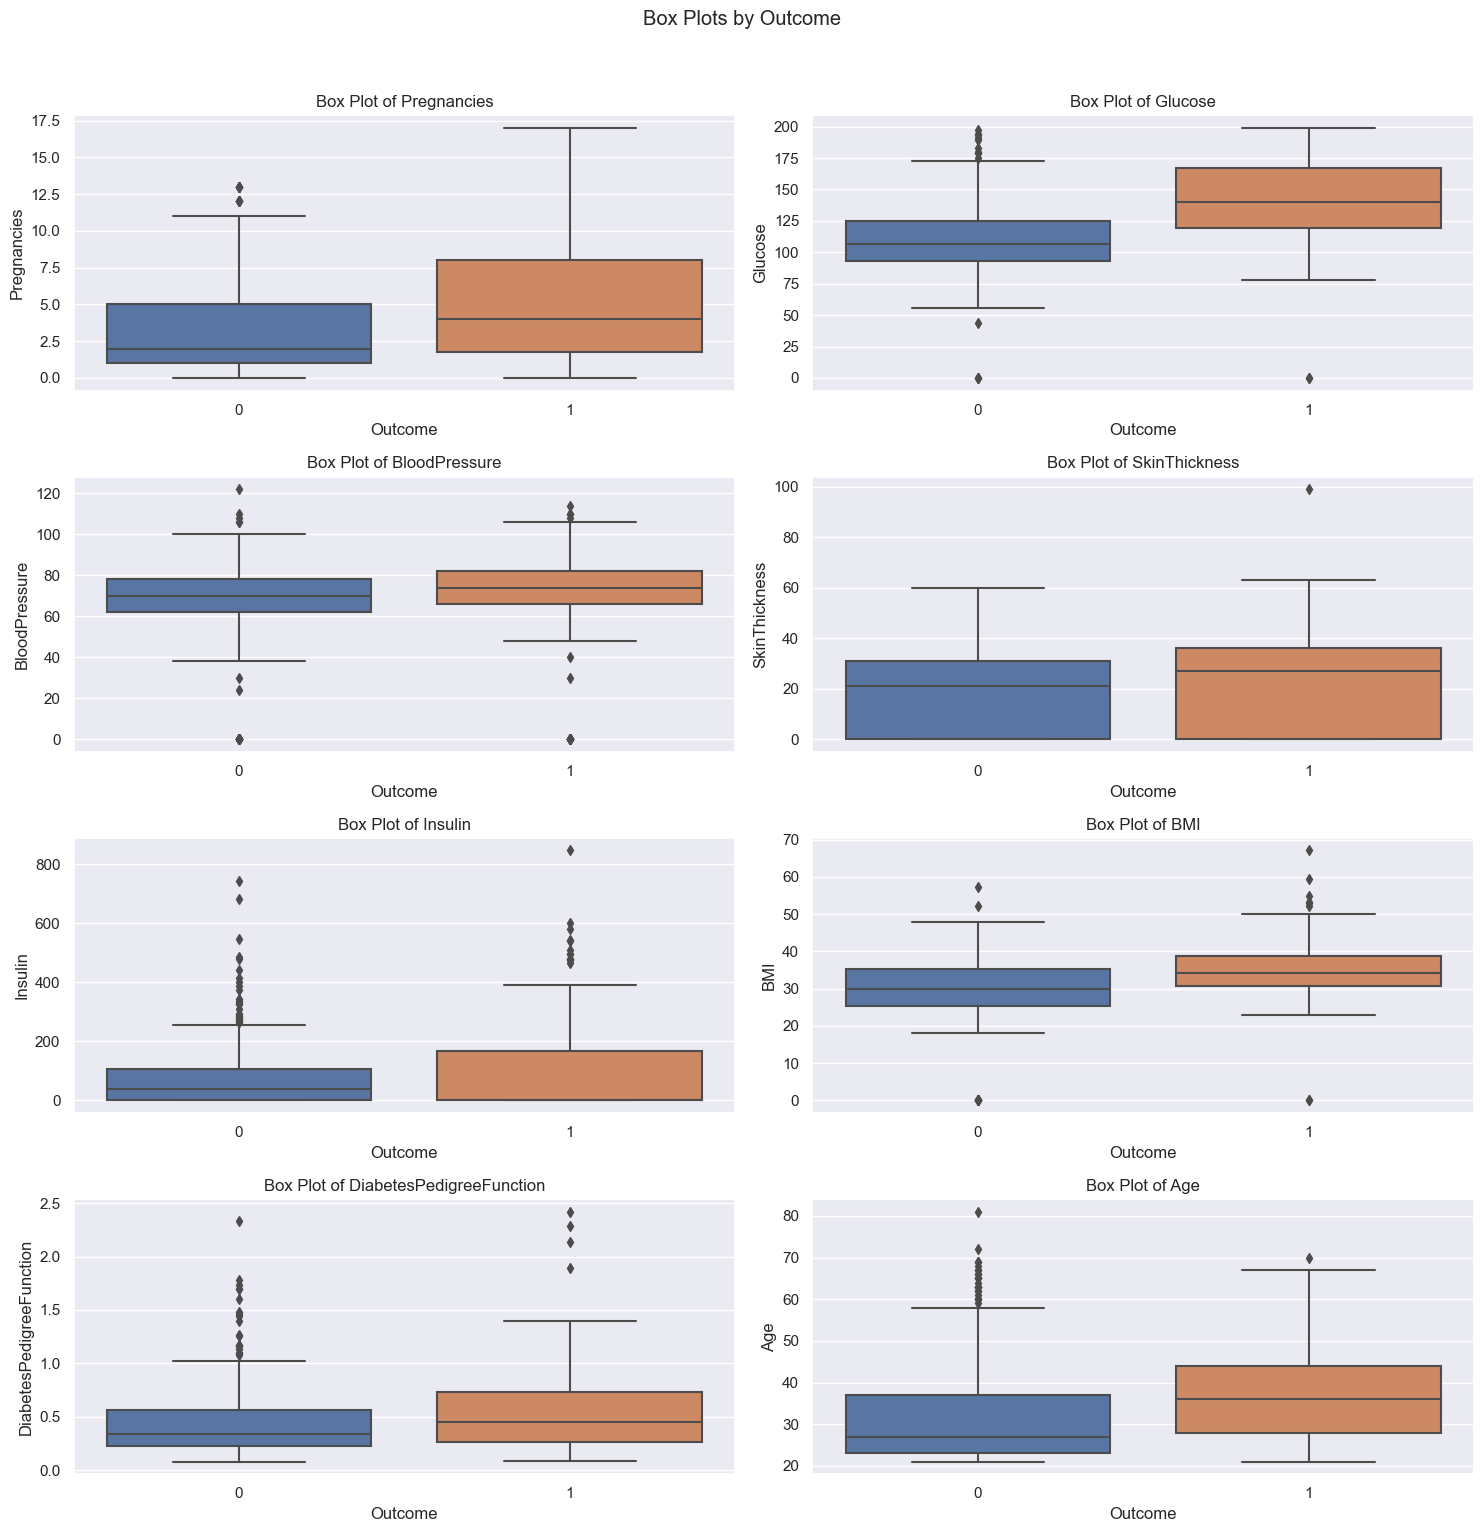

In [30]:
numerical_columns = diabetes.drop('Outcome', axis=1).columns

num_rows = len(numerical_columns) // 2
num_cols = 2

fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (15, 15))
fig.suptitle("Box Plots by Outcome", y = 1.02)

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x = 'Outcome', y = column, data = diabetes, ax = axes[i])
    axes[i].set_title(f"Box Plot of {column}")
    axes[i].set_xlabel("Outcome")
    axes[i].set_ylabel(column)

plt.tight_layout()

### It seems that the outliers are not due to errors, but indicate sick people, so I will not change or remove them. Outlier values for healthy people, e.g. for Insulin and Glucose, may indicate pregnant women.

### Zero value analysis.

In [31]:
diabetes1 = diabetes.copy(deep = True) # data copy, save

In [32]:
diabetes1.isin({0}).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [33]:
diabetes1[diabetes1.Glucose.isin({0})]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [34]:
diabetes1[diabetes1.BloodPressure.isin({0})]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [35]:
diabetes1[diabetes1.BMI.isin({0})]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


### I'm having a hard time deciding what to do. I'll make different variants and later when modeling I'll see what it looks like.
### diabetes => diabetes_without_changes (no deletion and no changes to data)
### diabetes1 => diabetes_z_medianą_z_S_I after changing the value 0 in Glucose, BloodPressure and BMI to the median with Insulin and SkinThicness
### diabetes3 => diabetes_z_medianą_bez_rek_I_S with median, but with only I and S records removed
### I chose the median because it is more resistant to outliers.

In [36]:
for i in ['Glucose', 'BloodPressure', 'BMI']:
    med = diabetes1.loc[diabetes1[i] != 0, i].median()
    print(i)
    print("Median:", med)
    diabetes1[i].replace(0, med, inplace=True)

Glucose
Median: 117.0
BloodPressure
Median: 72.0
BMI
Median: 32.3


In [37]:
diabetes1.isin({0}).sum() # check if it worked
# Successfully removed zeros

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

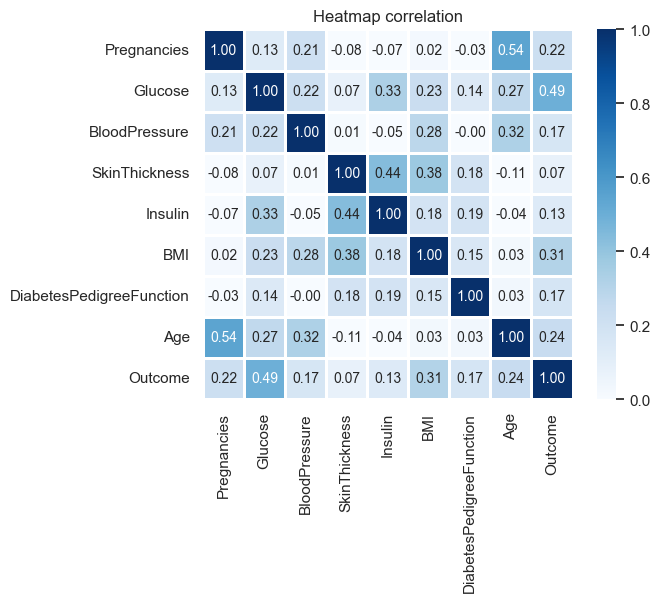

In [38]:
corr = diabetes1.corr()
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

### Correlation between the number of pregnancies and age (0.54), between BMI and insulin (0.44) - but this is probably due to 0, between glucose and outcome (0.49).

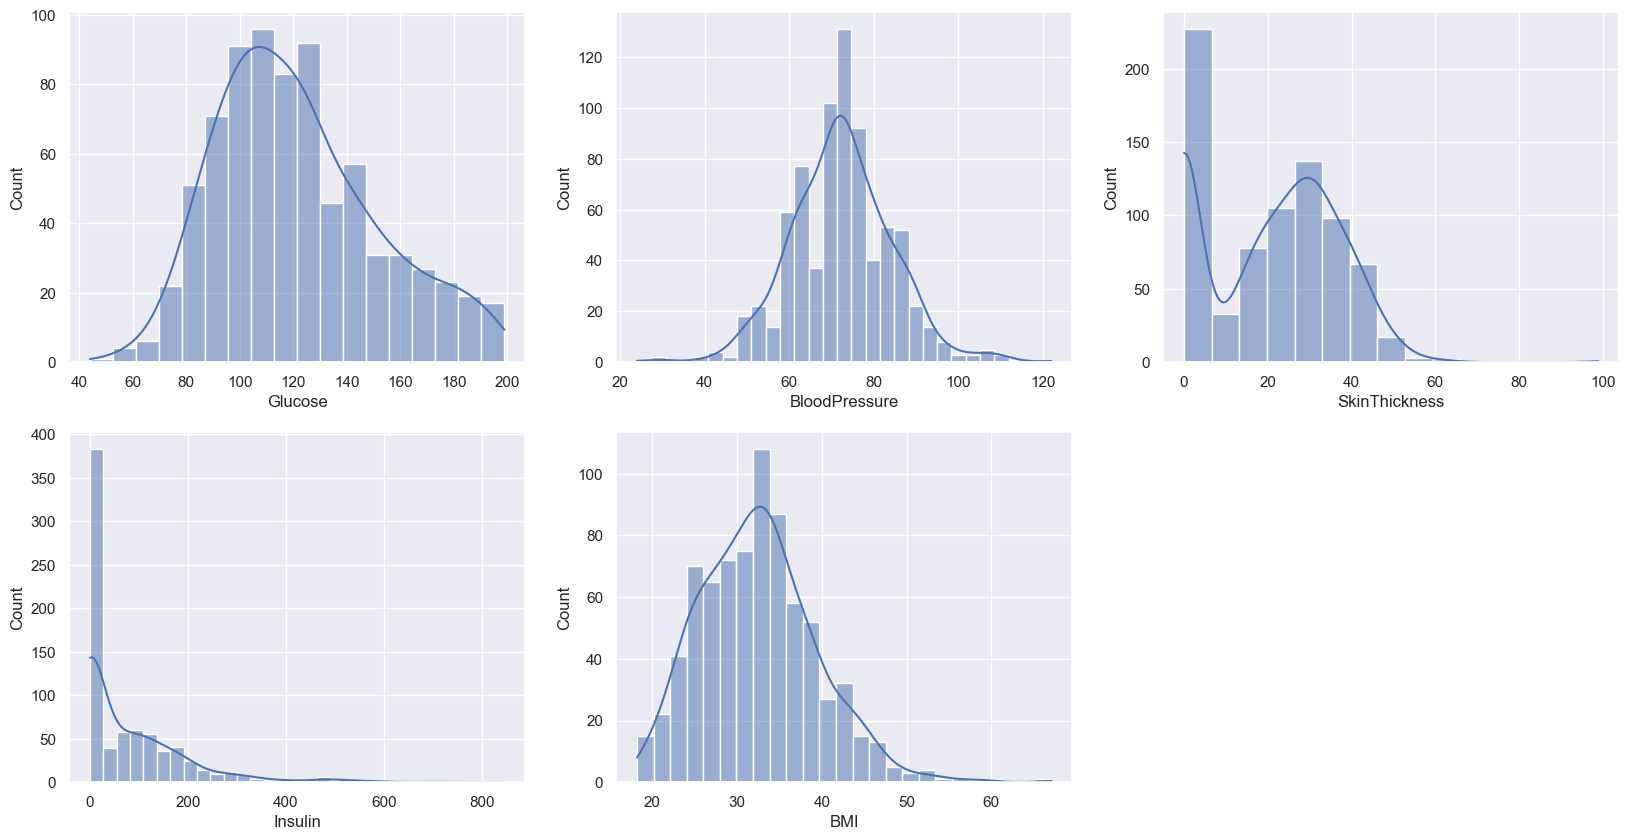

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

sns.histplot(data = diabetes1, x = 'Glucose', kde=True, ax = axs[0, 0])
sns.histplot(data = diabetes1, x = 'BloodPressure', kde=True, ax = axs[0, 1])
sns.histplot(data = diabetes1, x = 'SkinThickness', kde=True, ax = axs[0, 2])
sns.histplot(data = diabetes1, x = 'Insulin', kde=True, ax = axs[1, 0])
sns.histplot(data = diabetes1, x = 'BMI', kde=True, ax = axs[1, 1])

axs[1, 2].axis('off')

In [40]:
diabetes3 = diabetes1.copy(deep = True) # data copy, save

In [41]:
diabetes3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
diabetes3 = diabetes3.loc[(diabetes3[['Insulin', 'SkinThickness']] != 0).all(axis=1)]

In [43]:
diabetes3.isin({0}).sum() 

Pregnancies                  57
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     264
dtype: int64

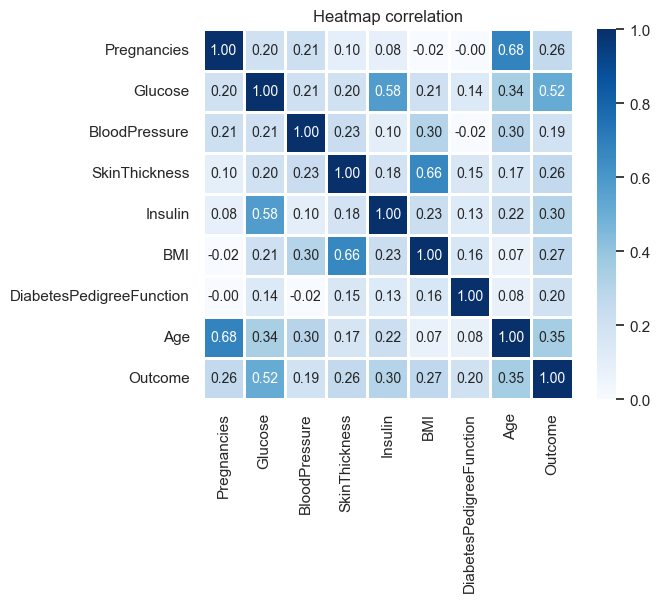

In [44]:
corr = diabetes3.corr()
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")
plt.show()

### Correlation between Insulin and Glucose (0.58), between age and pregnancies (0.68), between glucose and Outcome (0.52), correlation between BMI and SkinThickness (0.66).

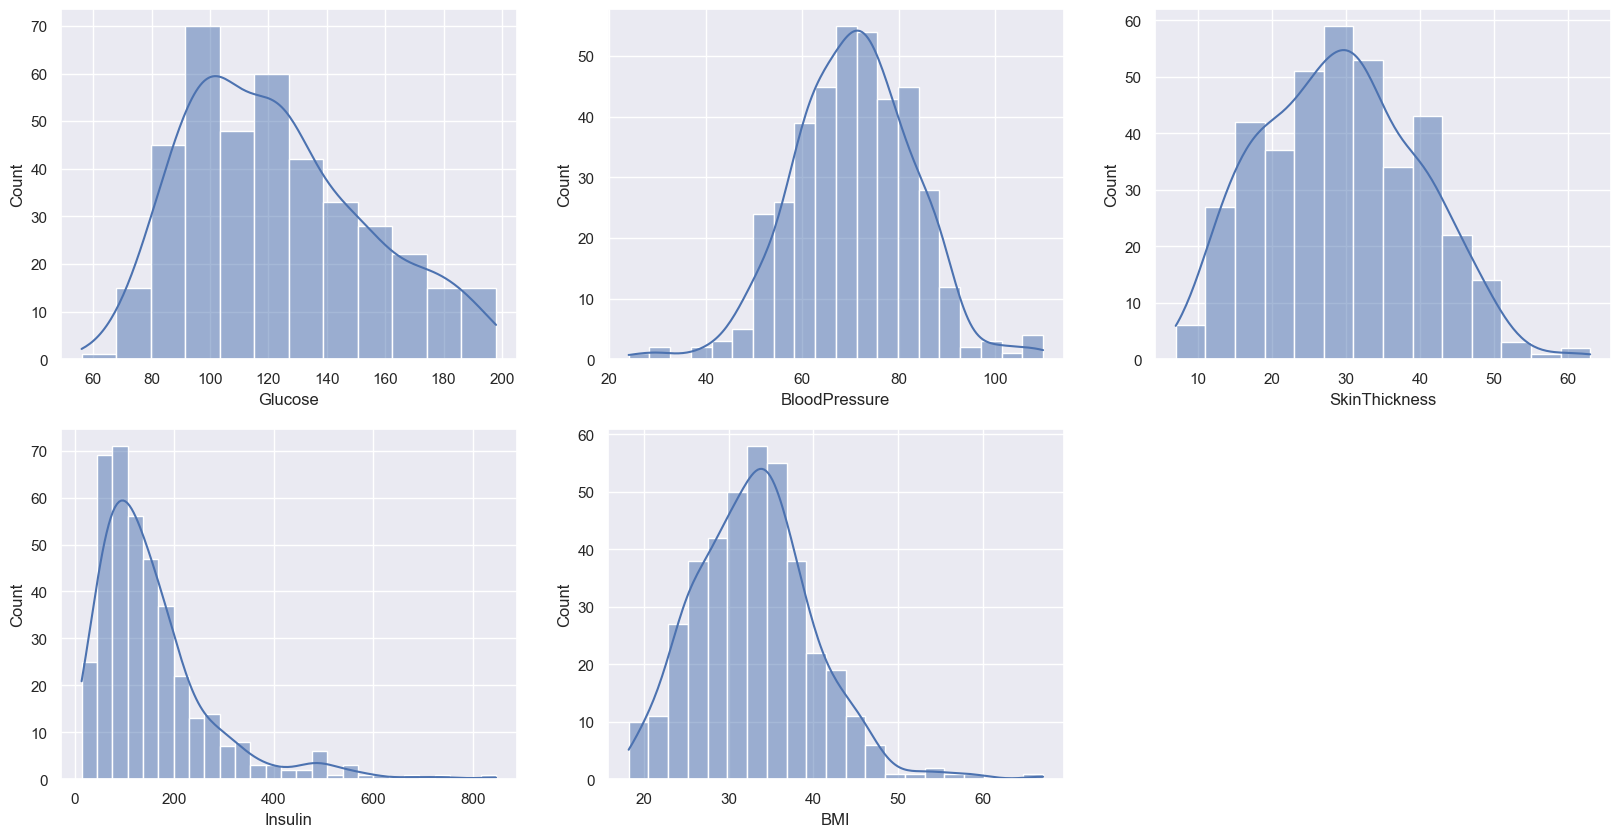

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

sns.histplot(data = diabetes3, x = 'Glucose', kde=True, ax = axs[0, 0])
sns.histplot(data = diabetes3, x = 'BloodPressure', kde=True, ax = axs[0, 1])
sns.histplot(data = diabetes3, x = 'SkinThickness', kde=True, ax = axs[0, 2])
sns.histplot(data = diabetes3, x = 'Insulin', kde=True, ax = axs[1, 0])
sns.histplot(data = diabetes3, x = 'BMI', kde=True, ax = axs[1, 1])

axs[1, 2].axis('off')

In [46]:
diabetes3.shape 

(394, 9)

In [47]:
diabetes.shape 

(768, 9)

### For diabetes3 the best correlation and distributions, but a lot of data is lost. Reduction from 768 to 394 -> loss of approximately 50%.

## New idea:
### For Insulin and SkinThicness, I will set the calculated median to 0 only based on the results of sick people, so that the result is as probable as possible and so that I do not lose data. So it will be diabetes5

In [48]:
diabetes5 = diabetes1.copy(deep = True) # data copy, save

In [49]:
zero_columns = ['Insulin', 'SkinThickness'] 
for column in zero_columns:
    med = diabetes5[(diabetes5[column] != 0) & (diabetes5['Outcome'] == 1)][column].median() # calculate the median for non-zero values, where Outcome == 1
    print(column)
    print('Mediana:', med)
    diabetes5.loc[(diabetes5[column] == 0) & (diabetes5['Outcome'] == 1), column] = med # I replace zero values with the calculated median

Insulin
Mediana: 169.5
SkinThickness
Mediana: 32.0


In [50]:
for i in ['Insulin', 'SkinThickness']:
    med = diabetes5[(diabetes5[column] != 0) & (diabetes5['Outcome'] == 1)][i].median() # calculate the median for non-zero values, where Outcome == 1
    print(i)
    print("Median:", med)
    diabetes5[i].replace(0, med, inplace=True) # I replace zero values with the calculated median

Insulin
Median: 169.5
SkinThickness
Median: 32.0


In [51]:
diabetes5.isin({0}).sum() 

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

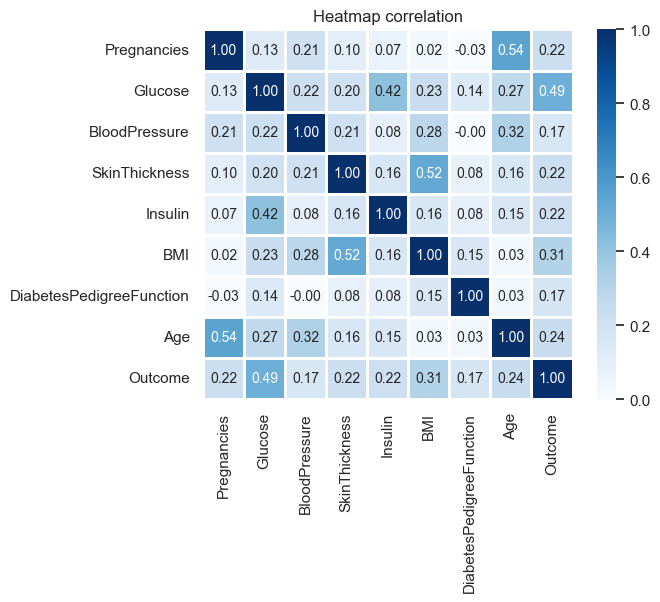

In [52]:
corr = diabetes5.corr()
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")
plt.show()

### Correlation between Insulin and Glucose (0.42), between age and pregnancies (0.54), between glucose and Outcome (0.49), correlation between BMI and SkinThickness (0.52).
### The correlation is worse than if the rows with zero values were removed. But it's possible that this is a more realistic correlation because it doesn't involve a 50% data loss.

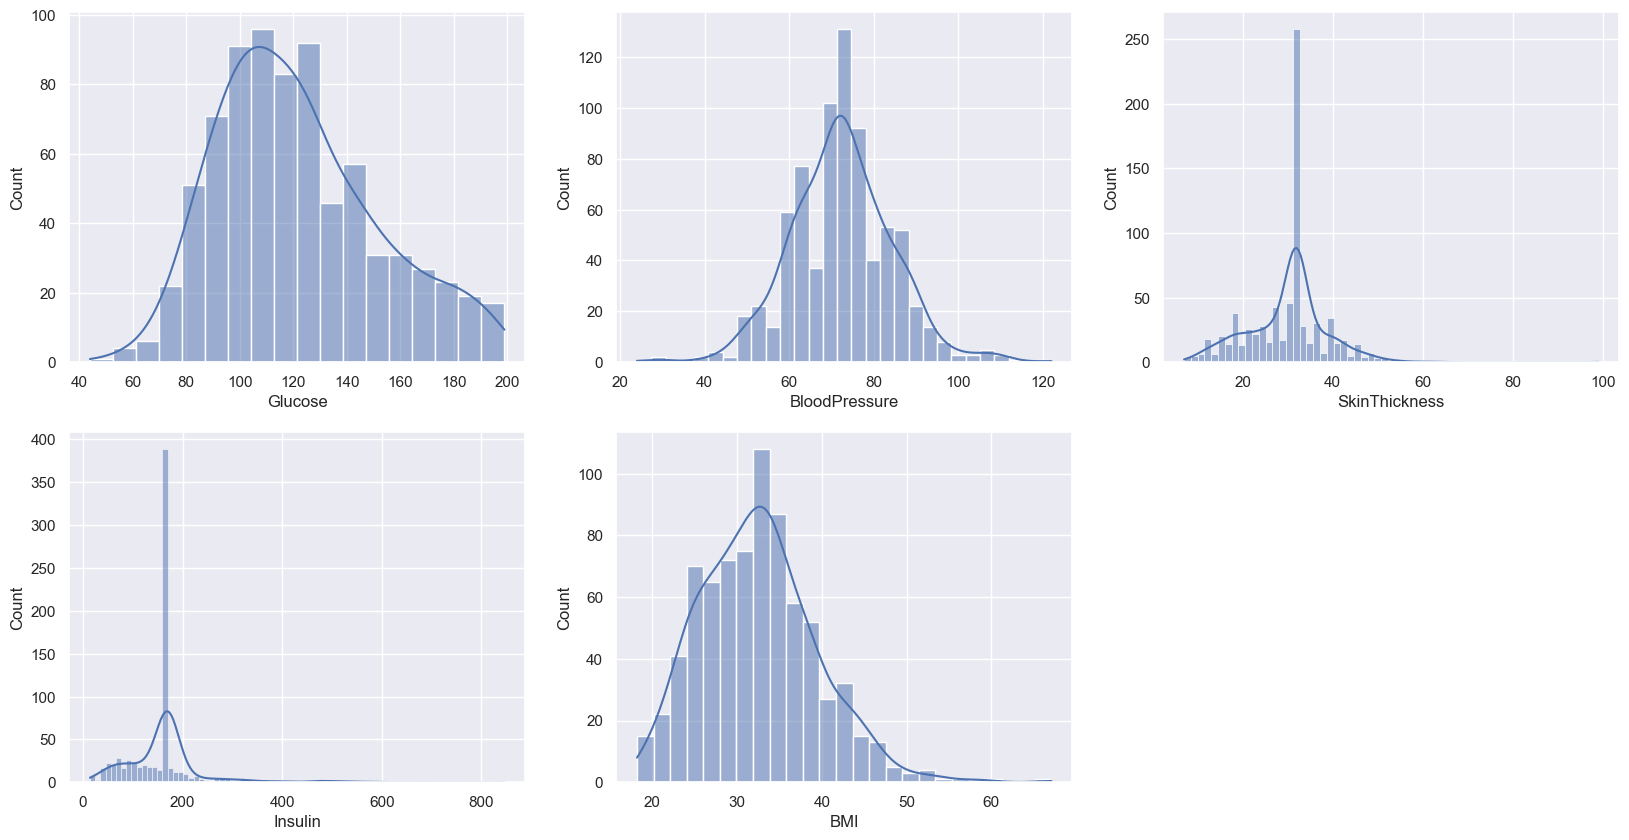

In [53]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

sns.histplot(data = diabetes5, x = 'Glucose', kde=True, ax = axs[0, 0])
sns.histplot(data = diabetes5, x = 'BloodPressure', kde=True, ax = axs[0, 1])
sns.histplot(data = diabetes5, x = 'SkinThickness', kde=True, ax = axs[0, 2])
sns.histplot(data = diabetes5, x = 'Insulin', kde=True, ax = axs[1, 0])
sns.histplot(data = diabetes5, x = 'BMI', kde=True, ax = axs[1, 1])

axs[1, 2].axis('off')

### Although on the other hand there is still a high result for one value (median). So I don't know which set to choose for the final analysis.
### Is diabetes3 - with median for Glucose, BMI and BloodPressure and with zero rows removed for Insulin and SkinThickness, but with a loss of 50% of the data.
### Is diabetes5 - with appropriate medians inserted. Worse correlation, but without losing a lot of data.
### Or maybe diabetes1? Without removing zero values for Insulin and SkinThickness?

In [54]:
diabetes.to_csv('diabetes_bez_zmian.csv', index = False)
diabetes1.to_csv('diabetes_z_mediana_z_S_I.csv', index = False)
diabetes3.to_csv('diabetes_z_mediana_bez_rek_I_S.csv', index = False) # best correlation
diabetes5.to_csv('diabetes_z_medianami.csv', index = False) # without losing a lot of data

### I think it's best to remove the rows with zero values for I and S. That is, select the diabetes3 data set. Because diabetes5 distorts the data by inserting one median value for all missing values.

### Analysis complete.